<a href="https://colab.research.google.com/github/Tavo826/UN/blob/main/Problema_de_valor_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de valor inicial

Se pretende analizar el comportamiento de las funciones de la forma $\dot{x} = f(t,x)$ que se proponen a continuación. Con el fin de analizar sus finitas soluciones cuando se dan valores iniciales a cada una de ellas $x(t)_{(t=0)} = x_0$ y conocer el gráfico de las bifurcaciones estudiando diferentes valores para sus contantes.

1. Función lineal: $\dot{x} = r*x$
2. Función no lineal: $\dot{x} = r*x - x*cos(x)$
3. Circuito RC trasladado: $\dot{Q} = \frac{V_0}{R}-\frac{Q}{R*C}$ 
4. Ecuación logística: $\dot{N} = rN(1 - \frac{N}{K})$

Para decidir el valor inicial que mejor convenga a la hora de encontrar una solución, se hace necesario algunas particularidades de la función que se está analizando, tales como:

* **Puntos fijos o equilibrios:** son aquellos valores que hacen que la función valga cero.

\begin{equation}
  \dot{x} = 0
\end{equation}

* **Estabilidad:** Al calcular el jacobiano de la función, dada una perturbación, se pueden presentar 2 casos para una perturbaciión positiva.
  * La función es INESTABLE si:

  \begin{equation}
    \frac{\partial \dot{x}}{\partial x} > 0
  \end{equation}

  * La función es ESTABLE si:

  \begin{equation}
    \frac{\partial \dot{x}}{\partial x} < 0
  \end{equation}

Para entender el comportamiento del flujo en el tiempo, se tienen diferentes métodos para aproximar gráficamente la forma que toma dicho flujo, en es caso se utilizarán el **método de Euler** y el **método de Runge-Kutta**

* **Método de Euler**: es un método iterativo que a partir de un valor inicial, emplea la derivada para conocer la pendiente de la recta tangente a ese punto, para luego trazar una recta hasta el siguiente valor con un incremento **h**.

\begin{equation}
  {x}_{i+1} = x_i + hf_{(t_i,x_i)}
\end{equation}

* **Método de Runge-Kutta**: es un método iterativo para la aproximación de ecuaciones diferencales ordinarias. Para orden cuatro se tiene:\
$k_1 = f_{(t_i,x_i)}$\
$k_2 = f_{(t_i+\frac{h}{2},x_i+\frac{k_1}{2})}$\
$k_3 = f_{(t_i+\frac{h}{2},x_i+\frac{k_2}{2})}$\
$k_4 = f_{(t_i+h,x_i+k_3)}$\
$x_{i+1} = x_i + \frac{h}{6}(k_1+k_2+k_3+k_4)$

In [ ]:
import matplotlib.style
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline

In [ ]:
def euler( func, h, tini, tfin, x0, params):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*func(ti,xi,params)
      ti = ti + h
    return t, x  

In [ ]:
def rk4( func, h, tini, tfin, x0, params):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = func(ti, xi, params)
      k2 = func(ti + 0.5*h,xi + 0.5*k1*h, params)
      k3 = func(ti + 0.5*h,xi + 0.5*k2*h, params)
      k4 = func(ti + h,xi + k3*h, params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x

In [ ]:
def graficar(ri, rf, funcion, h, tini, tfin, params):
  
  for x_0 in range(ri,rf):
    t1, x1 = euler(funcion, h, tini, tfin, x_0, params)
    if x_0 == ri:
      plt.scatter(t1, x1, c='red', s=30, label='Euler')
    else:
      plt.scatter(t1, x1, c='red', s=30)
  
  for x_0 in range(ri,rf):
    t2, x2 = rk4(funcion, h, tini, tfin, x_0, params)
    if x_0 == ri:
      plt.scatter(t2, x2, c='blue', s=20, label="RK4")
    else:
      plt.scatter(t2, x2, c='blue', s=20)

  plt.ylabel('x(t)')
  plt.xlabel(r'$t$')
  plt.grid()
  plt.legend(loc='best')
  plt.show()

## 1. Función lineal: $\dot{x} = r x$

Esta función tiene flujos de la forma

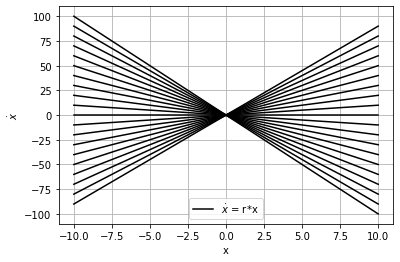

In [ ]:
x_t = np.linspace(-10, 10, 1000)

for r in range(-10,10,1):
  x_dot = r*x_t;
  if r == 0:
    plt.plot(x_t, x_dot, c='black', label='$\dot{x}$ = r*x')
  else:
    plt.plot(x_t, x_dot, c='black')

plt.ylabel('$\dot{x}$')
plt.xlabel('x')
plt.grid()
plt.legend(loc='best')
plt.show()

Esta función r*x = 0, solo tiene un punto fijo en x = 0

Obteniendo el jacobiano

\begin{equation}
  \frac{\partial (r*x)}{\partial x} = r
\end{equation}

De este resultado se puede decir que es estable para todo r < 0

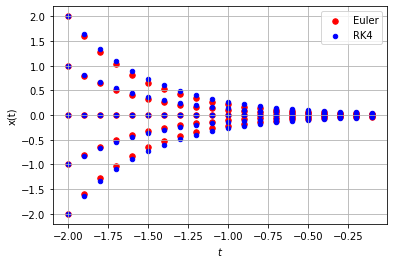

In [ ]:
def funcion_lineal(t, x, r):
  x_dot = r*x
  return x_dot

r_lineal = -2
h_lineal = 0.1
tini_lineal = -2
tfin_lineal = 0
ri_lineal = -2
rf_lineal = 3

graficar(ri_lineal, rf_lineal, funcion_lineal, h_lineal, tini_lineal, tfin_lineal, r_lineal)

Se puede apreciar cómo los flujos convergen al punto fijo para un valor de a = -2

# 2. Función no lineal: $\dot{x} = r*x - r*cos(x)$

Los flujos de esta función son de la forma:


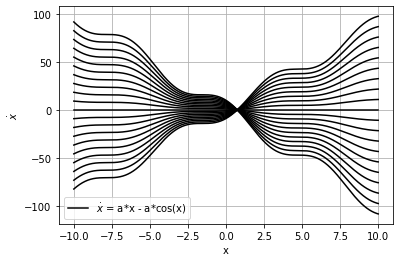

In [ ]:
for a in range(-10,10,1):
  x_dot = a*x_t - a*np.cos(x_t);
  if a == 0:
    plt.plot(x_t, x_dot, c='black', label='$\dot{x}$ = a*x - a*cos(x)')
  else:
    plt.plot(x_t, x_dot, c='black')

plt.ylabel('$\dot{x}$')
plt.xlabel('x')
plt.grid()
plt.legend(loc='best')
plt.show()

Resolviendo la ecuación $a*x - a*cos(x) = 0$ se encuentra el punto fijo en x $\approx$ 0.739085

Calculando el jacobiano

\begin{equation}
  \frac{\partial (a*x - a*cos(x))}{\partial x} = a + a*sen(x)
\end{equation}

La función es estable para los valores que cumplen

\begin{equation}
  a + a*sen(x) < 0
\end{equation}

Lo cual se cumple para a < 0 y $\frac{1}{2}(4\pi n-\pi) < x < \frac{1}{2}(4\pi n+3\pi) \forall n \in \mathbb{Z}$ 

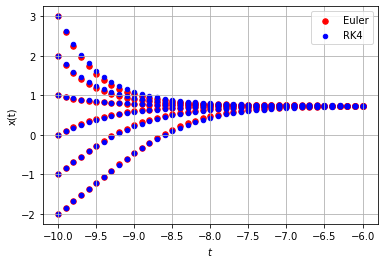

In [ ]:
def funcion_no_lineal(x, a):
  x_dot = a*x - a*np.cos(x)
  return x_dot

a_no_lineal = -1
h_no_lineal = 0.1
tini_no_lineal = -10
tfin_no_lineal = -6
ri_no_lineal = -2
rf_no_lineal = 4

graficar(ri_no_lineal, rf_no_lineal, funcion_no_lineal, h_no_lineal, tini_no_lineal, tfin_no_lineal, a_no_lineal)

Los flujos convergen al aproximado de 0.739085

# 3. Circuito RC transladado: $\dot{Q} = \frac{V_0}{R}-\frac{Q}{R*C}$  

Esta ecuación representa el comportamiento en la carga del capacitor, en la cual **$V_0$** representa el voltaje inicial, **R** el valor de la resitencia y **C** el valor del capacitor.

Se pueden apreciar los flujos a continuación

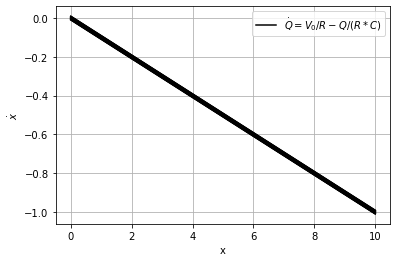

In [ ]:
#from sympy import Function, dsolve, Eq, symbols, pprint
#V,R,C,Q = symbols('V R C Q')

R = 1e3
C = 10e-3

x_t1 = np.linspace(0, 10, 1000)

for V in range(-10,10,1):
  x_dot =  V/R - x_t1/(R*C);
  if V == 0:
    plt.plot(x_t1, x_dot, c='black', label='$\dot{Q} = V_0/R - Q/(R*C)$')
  else:
    plt.plot(x_t1, x_dot, c='black')

plt.ylabel('$\dot{x}$')
plt.xlabel('x')
plt.grid()
plt.legend(loc='best')
plt.show()

In [ ]:
#Jacobiano
'''
dot_Q = Function('f')
dQ = Eq(dot_Q(Q).diff(Q), -1/(R*C))
pprint(dQ)
'''

"\ndot_Q = Function('f')\ndQ = Eq(dot_Q(Q).diff(Q), -1/(R*C))\npprint(dQ)\n"

In [ ]:
#Punto fijo
'''
pf_Q = Function('pf_Q')
pf_Q = dsolve(dQ, dot_Q(Q))
pprint(pf_Q)
'''

"\npf_Q = Function('pf_Q')\npf_Q = dsolve(dQ, dot_Q(Q))\npprint(pf_Q)\n"

Resolviendo la ecuación $\frac{V_0}{R}-\frac{Q}{R*C} = 0$ se encuentra que el punto fijo es Q = $V_0*C$

Calculando el jacobiano

\begin{equation}
  \frac{\partial (\frac{V_0}{R}-\frac{Q}{R*C})}{\partial Q} = -\frac{1}{R*C}
\end{equation}

La función es estable para cualquier valor escogido de R y C

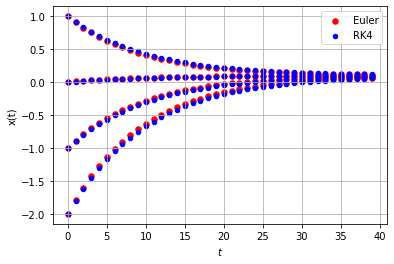

In [ ]:
def funcion_rc(x, V):
  x_dot = V/R - x/(R*C)
  return x_dot

V_rc = 10
h_rc = 1
tini_rc = 0
tfin_rc = 40
ri_rc = -2
rf_rc = 2

graficar(ri_rc, rf_rc, funcion_rc, h_rc, tini_rc, tfin_rc, V_rc)

Se puede apreciar cómo el flujo converge al valor de $V_0*C$ el cual es $10*0.001 = 0.1$

# 4. Ecuación logística: $\dot{N} = r*N(1 - \frac{N}{K})$

La ecuación representa el crecimiento en una población con una taza de crecimiento **r**, en donde se tiene en cuenta la sobrepoblación y los recursos limitados. Así, mientras más grande sea el N, la taza de crecimiento ($\frac{\dot{N}}{N}$) se hace más pequeña. Cuando la población llega a cierta capacidad (K), la taza de crecimiento se vuelve negativa; la taza de muerte se hace más grande que la de crecimiento.

El flujo de esta función se aprecia a continuación.

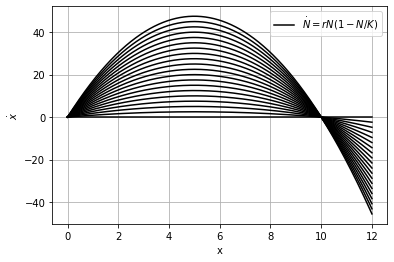

In [ ]:
x_t2 = np.linspace(0, 12, 1000)

K = 10

for a in range(0,20,1):
  x_dot = a*x_t2*(1 - x_t2/K)
  if a == 0:
    plt.plot(x_t2, x_dot, c='black', label='$\dot{N} = rN(1 - N/K)$')
  else:
    plt.plot(x_t2, x_dot, c='black')

plt.ylabel('$\dot{x}$')
plt.xlabel('x')
plt.grid()
plt.legend(loc='best')
plt.show()

Resolviendo la ecuación $r*N(1 - \frac{N}{K}) = 0$ se tienen dos puntos fijos, uno en N = 0 y el otro en N = K. Para el análisis, el crecimiento de una población con 0 individuos no tiene sentido, por lo que el punto fijo sería N = K.

Calculando el jacobiano

\begin{equation}
  \frac{\partial (r*N(1 - \frac{N}{K}))}{\partial N} = r - \frac{2*r*N}{K}
\end{equation}

La función es estable para de r < 0 y $N > \frac{K}{2}$


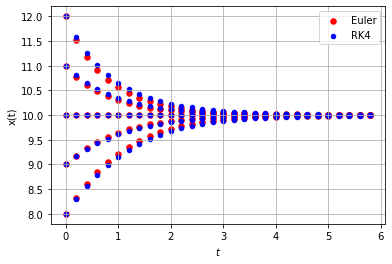

In [ ]:
def funcion_log(x, r):
  x_dot = r*x*(1 - x/K)
  return x_dot

r_log = 1
h_log = 0.2
tini_log = 0
tfin_log = 6
ri_log = 8
rf_log = 13

graficar(ri_log, rf_log, funcion_log, h_log, tini_log, tfin_log, r_log)

Con las condiciones adecuadas, el flujo converge al valor de la capacidad de la población K
